In [1]:
from matplotlib import font_manager, rc  # 한글사용 matplotlib
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import os
import csv
import codecs
import numpy as np
import json
import tensorflow as tf
import jpype
from konlpy.tag import Okt
from collections import Counter
from IPython.core.interactiveshell import InteractiveShell
from pandas import DataFrame as df
InteractiveShell.ast_node_interactivity = 'all'
os.chdir("C:/Users/windd/pythondata")
%matplotlib inline
font_name = font_manager.FontProperties(
    fname="c:/Windows/Fonts/malgun.ttf").get_name()
rc('font', family=font_name)

C:\ProgramData\Anaconda3\lib\site-packages\h5py\__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters


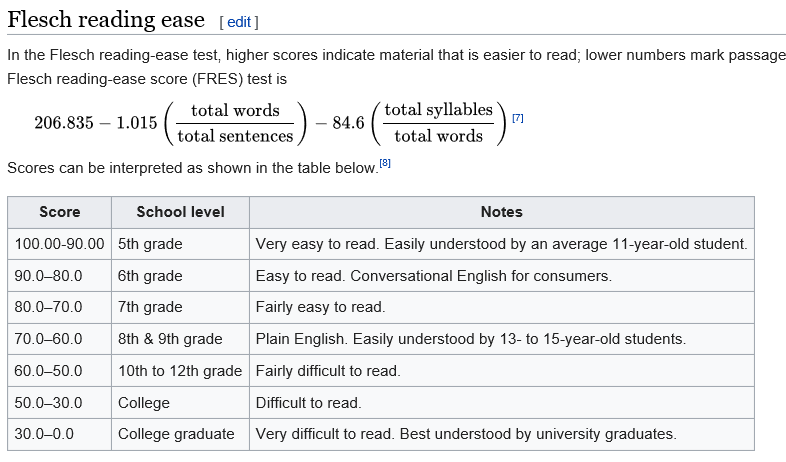
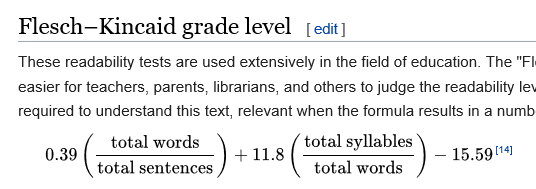

In [11]:
# 패션 부분 데이터 읽어오기

fashion = pd.read_excel('수료/Wadiz_fashion.xlsx')

In [14]:
# url 부분 리스트로 저장

project_url = list(fashion.url)

In [18]:
len(project_url)

1826

In [94]:
# test_url_list 생성

test_url = project_url[:10]
test_url

['https://www.wadiz.kr/web/campaign/detail/40701',
 'https://www.wadiz.kr/web/campaign/detail/17680',
 'https://www.wadiz.kr/web/campaign/detail/37948',
 'https://www.wadiz.kr/web/campaign/detail/37362',
 'https://www.wadiz.kr/web/campaign/detail/39049',
 'https://www.wadiz.kr/web/campaign/detail/42188',
 'https://www.wadiz.kr/web/campaign/detail/40484',
 'https://www.wadiz.kr/web/campaign/detail/40793',
 'https://www.wadiz.kr/web/campaign/detail/38997',
 'https://www.wadiz.kr/web/campaign/detail/40627']

In [95]:
# url을 기반으로 bs활용하여 html을 모두 긁어 리스트로 만드는 함수

from urllib.request import urlopen

def make_html_list(project_url):
    html_list = []
    for i in project_url:
        html = urlopen(i)
        bsObject = BeautifulSoup(html, 'lxml')
        html_list.append(bsObject)
    return html_list

html_list = make_html_list(test_url)

In [97]:
# html 중에서 내용 부분만 파싱

raw_html = html_list[1].find_all('div',{'class':'inner-contents fr-view'})

# strong, u 부분 개수 세기
# 텍스트에서 강조하거나 밑줄로 하이라이트 하는 경우
# </strong> </u>의 경우도 있지만 중복되는 거 같아서 아래의 코드만 활용했음

str(raw_html).count('<strong>')
str(raw_html).count('<u>')

46

37

In [98]:
# count strong, u 함수

def count_s_u(raw_html):
    return str(raw_html).count('<strong>'), str(raw_html).count('<u>')

count_s_u(raw_html)

(46, 37)

In [108]:
# html 정제
# html -> str 변환
# html에서 필요없는 특수문자, 영어 제거

import re 

def clean_text(raw_html):
    str_text = str(raw_html)
    str_text = re.sub(r'<[^>]*>','',str_text)
    str_text = re.sub(r'(\xa0|\n)','',str_text)
    cleaned_text = re.sub('[a-zA-Z]' , '', str_text)
    cleaned_text = re.sub('[\{\}\[\]\/,;|\)*~`^\-_+<>@➤▶\#$%&\\\=\(\'\"]',
                          '', cleaned_text)
    return cleaned_text

clean_text = clean_text(str_test2)

In [110]:
# 문장개수 구하는 함수
# 정제된 텍스트에 대해서 ., :, ?, ! 기호로 나누어 문장 단위 리스트로 만듬
# 각 문장에서 길이가 4 이상인 것만 추출하여 문장으로 생각


def count_sentence(cleaned_text):
    text_fin =  re.split(r'(\.|\!|\?|\:)',cleaned_text)
    cleaned_list = [x for x in text_fin if len(x) >4]
    return cleaned_list, len(cleaned_list)

sentence_list, sentence_len =count_sentence(clean_text)
sentence_len

127

In [120]:
# 현재까지의 진행으로 문장개수, strong, u의 개수를 구했다
# 앞으로 진행되는 단어 개수, 음절 개수는 clean_text로 진행

In [119]:
clean_text[:10]

'해외 명품 신발들이'

In [114]:
tag = Okt()
nouns = tag.nouns(clean_text)
morphs = tag.morphs(clean_text)
pos = tag.pos(clean_text)

C:\ProgramData\Anaconda3\lib\site-packages\jpype\_core.py:210: UserWarning: 
-------------------------------------------------------------------------------
Deprecated: convertStrings was not specified when starting the JVM. The default
behavior in JPype will be False starting in JPype 0.8. The recommended setting
for new code is convertStrings=False.  The legacy value of True was assumed for
this session. If you are a user of an application that reported this warning,
please file a ticket with the developer.
-------------------------------------------------------------------------------

  """)


In [130]:
pos[:10]

[('해외', 'Noun'),
 ('명품', 'Noun'),
 ('신발', 'Noun'),
 ('들', 'Suffix'),
 ('이', 'Josa'),
 ('쓰는', 'Verb'),
 ('송아지', 'Noun'),
 ('가죽', 'Noun'),
 ('으로', 'Josa'),
 ('만든', 'Verb')]